In [1]:
import numpy as np
from keras.datasets import imdb, reuters
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

2023-03-07 18:20:02.087344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 18:20:02.182486: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-07 18:20:02.515438: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/bjbae/miniconda3/envs/ml/lib/
2023-03-07 18:20:02.517308: W tensorflow/compiler/xla/stream_

In [2]:
(train_data, train_labels), (test_data,
                             test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
def vectorize_seqences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

In [4]:
x_train = vectorize_seqences(train_data)
x_test = vectorize_seqences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

2023-03-07 18:20:26.894802: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-07 18:20:26.914450: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-07 18:20:26.914757: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-07 18:20:26.915151: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other ope

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2023-03-07 18:21:54.330905: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-07 18:21:59.972123: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x240124f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-07 18:21:59.972163: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-03-07 18:21:59.987515: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-07 18:22:00.210627: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-07 18:22:00.261952: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once f

30/30 [==============================] - 30s 212ms/step - loss: 0.5299 - accuracy: 0.7780 - val_loss: 0.4046 - val_accuracy: 0.8619
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3348 - accuracy: 0.8909 - val_loss: 0.3269 - val_accuracy: 0.8769
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2526 - accuracy: 0.9173 - val_loss: 0.2900 - val_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 5s 169ms/step - loss: 0.2053 - accuracy: 0.9314 - val_loss: 0.2820 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1718 - accuracy: 0.9435 - val_loss: 0.2754 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1462 - accuracy: 0.9525 - val_loss: 0.2865 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 5s 166ms/step - loss: 0.1265 - accuracy: 0.9593 - val_loss: 0.3096 - val_accuracy: 0.8773
Epoch 8/20
30/30 [=====

In [8]:
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


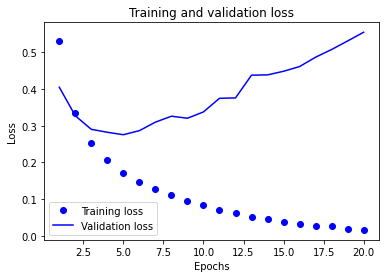

In [9]:
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

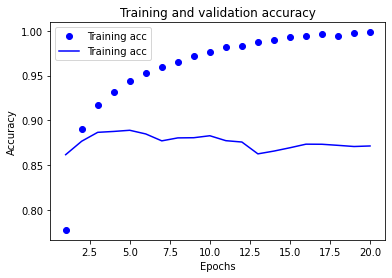

In [10]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Further Experiments

Try using larger or smaller layers: 32 units, 128 units and so on

In [14]:
model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model2.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 211ms/step - loss: 0.5193 - accuracy: 0.7628 - val_loss: 0.3763 - val_accuracy: 0.8676
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3096 - accuracy: 0.8888 - val_loss: 0.2985 - val_accuracy: 0.8874
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2339 - accuracy: 0.9168 - val_loss: 0.2781 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 5s 164ms/step - loss: 0.1898 - accuracy: 0.9312 - val_loss: 0.2865 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1577 - accuracy: 0.9466 - val_loss: 0.2969 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1369 - accuracy: 0.9523 - val_loss: 0.2902 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 5s 156ms/step - loss: 0.1192 - accuracy: 0.9581 - val_loss: 0.3047 - val_accuracy: 0.8830
Epoch 8/20
3

KeyboardInterrupt: 

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])